Load the Dataset

In [4]:
import pandas as pd

df = pd.read_csv("HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Data Cleaning

In [5]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Remove duplicates

In [6]:
df = df.drop_duplicates()

Convert Attrition to binary (for analysis)

In [7]:
df['Attrition_Flag'] = df['Attrition'].map({'Yes':1, 'No':0})

Summary Statistics

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Flag
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


Attrition Count

In [9]:
df['Attrition'].value_counts(normalize=True) * 100

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

Correlation Analysis -
Numeric Correlation

In [10]:
df[['Age', 'MonthlyIncome', 'YearsAtCompany', 'Attrition_Flag']].corr()

,Age,MonthlyIncome,YearsAtCompany,Attrition_Flag
Age,1.000000,0.497855,0.311309,-0.159205
MonthlyIncome,0.497855,1.000000,0.514285,-0.159840
YearsAtCompany,0.311309,0.514285,1.000000,-0.134392
Attrition_Flag,-0.159205,-0.159840,-0.134392,1.000000


**Visualizations**
--Attrition Count

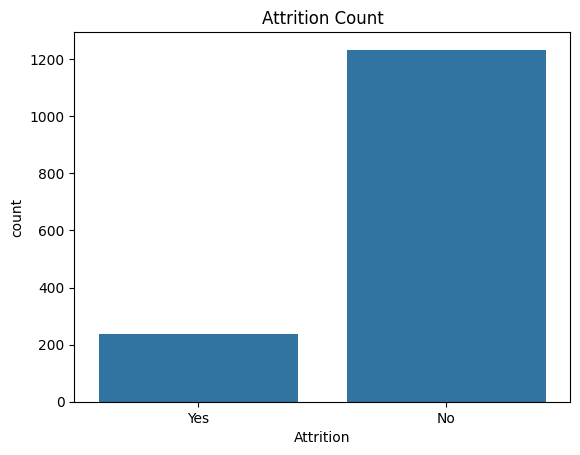

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count")
plt.show()


Age Distribution

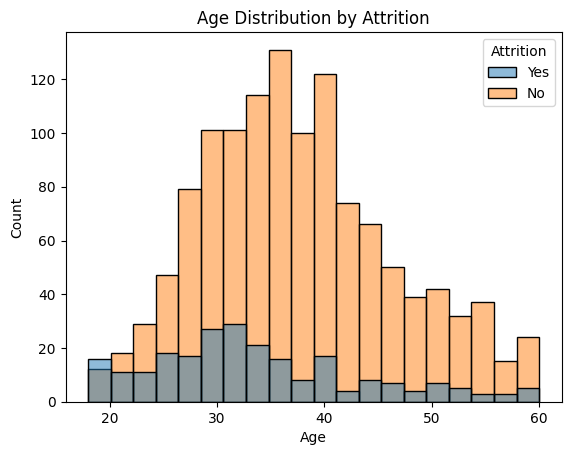

In [13]:
sns.histplot(data=df, x='Age', hue='Attrition', bins=20)
plt.title("Age Distribution by Attrition")
plt.show()


Salary vs Attrition

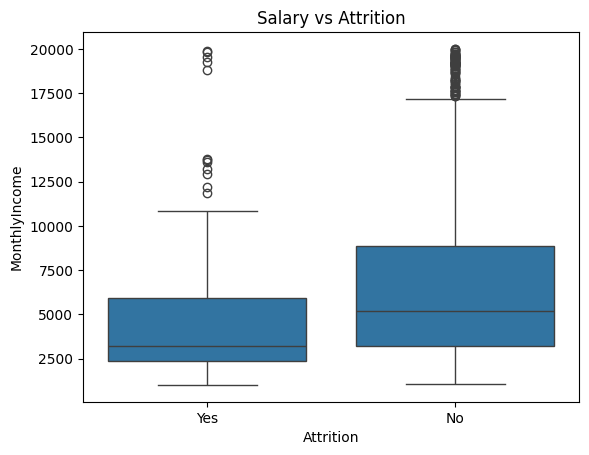

In [14]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Salary vs Attrition")
plt.show()


Job Satisfaction vs Attrition

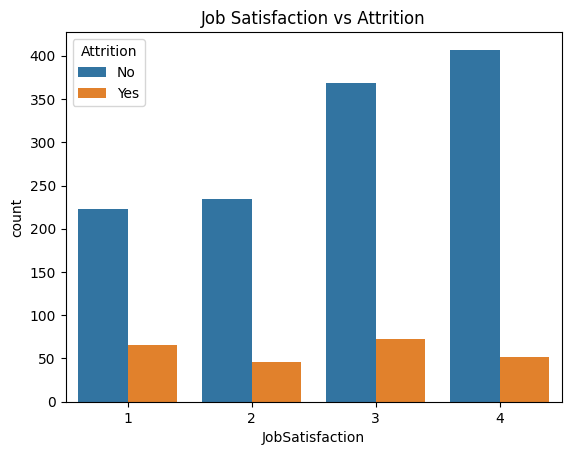

In [15]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Job Satisfaction vs Attrition")
plt.show()


OverTime vs Attrition

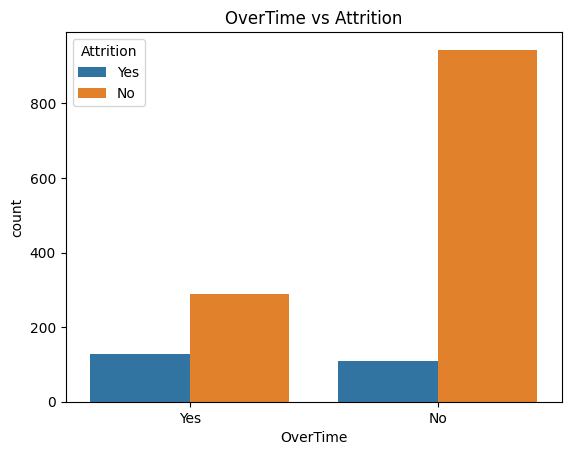

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("OverTime vs Attrition")
plt.show()


Identify Top Predictors (Decision Tree)
 Encode Categorical Columns

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['OverTime'] = le.fit_transform(df['OverTime'])
df['Gender'] = le.fit_transform(df['Gender'])


Train Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

X = df[['Age','MonthlyIncome','YearsAtCompany','JobSatisfaction','OverTime']]
y = df['Attrition_Flag']

model = DecisionTreeClassifier(max_depth=4)
model.fit(X, y)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Feature Importance

In [17]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance


,Feature,Importance
1,MonthlyIncome,0.424201
4,OverTime,0.261233
0,Age,0.147360
2,YearsAtCompany,0.146116
3,JobSatisfaction,0.021090
